<a href="https://colab.research.google.com/github/Saloni12346/PRODIGY_ML_02/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


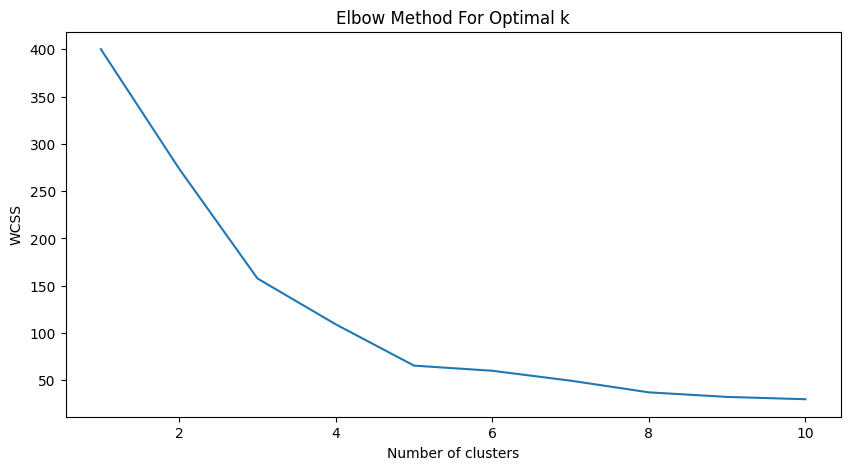

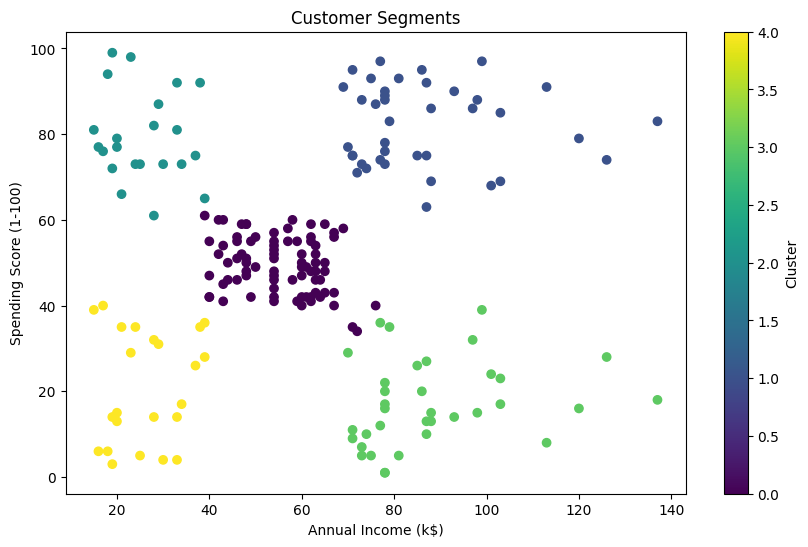

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data = pd.read_csv('/Mall_Customers.csv')  # Update path if necessary

# Step 2: Data Preprocessing
# Display the first few rows and check for missing values
print(data.head())
print(data.isnull().sum())

# Select relevant features for clustering (modify based on the dataset structure)
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Scaling the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-means Clustering
# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters (e.g., k=5 based on the elbow plot)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Step 5: Visualize the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()
